In [34]:
#load rquired packages
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [2]:
#initialse a variable (testing vader)
analyser = SentimentIntensityAnalyzer()

In [3]:
# Testing vader paakage
analyser.polarity_scores("The movie is good")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [4]:
# Testing vader paakage
analyser.polarity_scores("The movie is very bad")

{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.5849}

In [9]:
#categorise the sentiments into 0 for neutral, -1 for negative, 1 for positive (for compound)
def sentiment_analyzer_scores(text):
    score=analyser.polarity_scores(text)
    lb=score['compound']
    if lb>=0.05:
        return 1
    elif(lb>-0.5) and (lb<0.05):
        return 0
    else:
        return -1

In [13]:
sentiment_analyzer_scores("The movie is VERY BAD!")

-1

In [14]:
sentiment_analyzer_scores("The movie is VERY GOOD!")

1

In [15]:
sentiment_analyzer_scores("The movie is LONG")

0

In [16]:
import tweepy

In [17]:
consumer_key = 'l7ecjqISp5QbzUOHbgbti14LB'
consumer_secret = 'i0tQusU3n1yDTLBrPu3wjijWLHvuCumuo0s82g7Uooud8mXNAi'
access_token = '1144586854898909184-jKEdg5qv38vAq4uJVGfDGjr1TjH0zE'
access_token_secret = 'leXZf2zssurRBf5jK4GZEm8n0HDcptcaZ9GBIJLgYRcAt'

In [18]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [19]:
#ask user to enter the twitter name and the number of tweets
#The function will also output the full text of the tweet. For example
#list_tweets[2] will print the 3rd tweet
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw


In [20]:
userID='realDonaldTrump'
count=200

In [21]:
tw_trump=list_tweets(userID, count)

In [25]:
#tw_trump[12]
#tw_trump[0]
tw_trump[10]

'Thank you @MSNBC, real professionals! @chucktodd @maddow https://t.co/7ZCkcUQ4yA'

wew

In [26]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    return lst

In [27]:
tw_trump[10]

'Thank you @MSNBC, real professionals! @chucktodd @maddow https://t.co/7ZCkcUQ4yA'

In [28]:
tw_trump=clean_tweets(tw_trump)

In [29]:
tw_trump[10]

'Thank you , real professionals!   '

In [31]:
sentiment_analyzer_scores(tw_trump[10])

1

In [32]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents


/Users/webbersjiang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


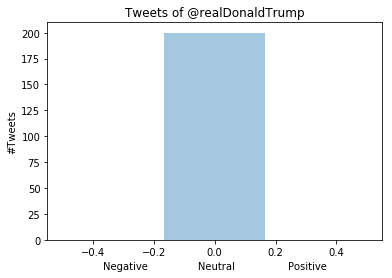

In [35]:
tw_trump_sent=anl_tweets(tw_trump, userID)

"Awwwww shit. Probably should have checked that they didn't mean Artificial Insemination before I committed.... 😆\n\nNah, just kidding - honoured to be invited and looking forward to it! "